<a href="https://colab.research.google.com/github/Jatansahu/Network_Intrusion_Detection_DataMining/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORATORY DATA ANALYSIS**

#Importing Libraries

In [1]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import missingno as msg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

#Loading Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data= pd.read_csv("/content/drive/MyDrive/CTU-IoT-Malware-Capture-1-1conn.log.labeled.csv", sep='|')

In [4]:
data

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,1.526283e+09,CUyBg1WA04SBmf3ah,192.168.100.103,43763.0,16.219.83.137,64906.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008744,1.526283e+09,CvaIoX2b9VynuYieBf,192.168.100.103,43763.0,100.57.245.196,39435.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008745,1.526283e+09,CVHrUzIUN0mW5lQsl,192.168.100.103,43763.0,249.99.119.9,26169.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-
1008746,1.526283e+09,CkGlnL2pxzlusrFlLj,192.168.100.103,43763.0,205.103.167.192,18241.0,udp,-,-,-,...,-,0.0,D,1.0,40.0,0.0,0.0,-,Benign,-


In [5]:
#Finding shape of the dataset
data.shape

(1008748, 23)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 23 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   ts              1008748 non-null  float64
 1   uid             1008748 non-null  object 
 2   id.orig_h       1008748 non-null  object 
 3   id.orig_p       1008748 non-null  float64
 4   id.resp_h       1008748 non-null  object 
 5   id.resp_p       1008748 non-null  float64
 6   proto           1008748 non-null  object 
 7   service         1008748 non-null  object 
 8   duration        1008748 non-null  object 
 9   orig_bytes      1008748 non-null  object 
 10  resp_bytes      1008748 non-null  object 
 11  conn_state      1008748 non-null  object 
 12  local_orig      1008748 non-null  object 
 13  local_resp      1008748 non-null  object 
 14  missed_bytes    1008748 non-null  float64
 15  history         1008748 non-null  object 
 16  orig_pkts       1008748 non-null  fl

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
tunnel_parents    0
label             0
detailed-label    0
dtype: int64


#Handling Missing Values

In [8]:
# Dropping ts and uid
data = data.drop(columns=['ts','uid'])

In [9]:
# Further working for columns which contains 0.0
missing_val_col = []

# Iterate through each column in the DataFrame
for column in data.columns:
    # Check if the column contains 0.0
    if 0.0 in data[column].unique():
        missing_val_col.append(column)

# Print the list of column names that contain 0.0
print("Columns with 0.0 ")
print(missing_val_col)

Columns with 0.0 
['id.resp_p', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']


In [10]:
# Initialize a dictionary to store the percentage of 0.0 values for each column
percentage_dict = {}

# Calculate the percentage of "-" values for each column
for column in missing_val_col:
    percentage = (data[column] == 0.0).mean() * 100
    percentage_dict[column] = percentage

# Print the percentage of "-" values for each column
for column, percentage in percentage_dict.items():
    print(f"Column '{column}' has {percentage:.2f}% 0.0 values.")

Column 'id.resp_p' has 0.33% 0.0 values.
Column 'missed_bytes' has 100.00% 0.0 values.
Column 'orig_pkts' has 0.00% 0.0 values.
Column 'orig_ip_bytes' has 0.00% 0.0 values.
Column 'resp_pkts' has 98.03% 0.0 values.
Column 'resp_ip_bytes' has 98.03% 0.0 values.


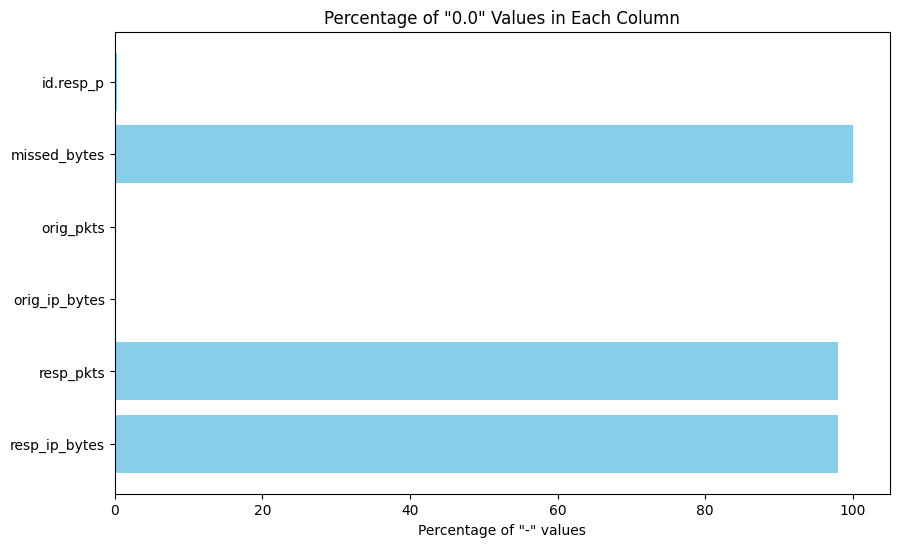

In [11]:
# Extract column names and percentages
columns = list(percentage_dict.keys())
percentages = list(percentage_dict.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(columns, percentages, color='skyblue')
plt.xlabel('Percentage of "-" values')
plt.title('Percentage of "0.0" Values in Each Column')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Display the plot
plt.show()

In [12]:
# Dropping all the columns which higher amount of 0.0 values
data = data.drop(columns=['missed_bytes','resp_pkts','resp_ip_bytes'])

In [13]:
# Further working for columns which contains "-"
missing_val_col_2 = []

# Iterate through each column in the DataFrame
for column in data.columns:
    # Check if the column contains "-"
    if '-' in data[column].unique():
        missing_val_col_2.append(column)

# Print the list of column names that contain "-"
print("Columns with '-' character:")
print(missing_val_col_2)

<ipython-input-13-705b90fd09a0>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '-' in data[column].unique():


Columns with '-' character:
['service', 'duration', 'orig_bytes', 'resp_bytes', 'local_orig', 'local_resp', 'history', 'tunnel_parents', 'detailed-label']


In [14]:
# Initialize a dictionary to store the percentage of "-" values for each column
percentage_dict_2 = {}

# Calculate the percentage of "-" values for each column
for column in missing_val_col_2:
    percentage = (data[column] == '-').mean() * 100
    percentage_dict_2[column] = percentage

# Print the percentage of "-" values for each column
for column, percentage in percentage_dict_2.items():
    print(f"Column '{column}' has {percentage:.2f}% '-' values.")

Column 'service' has 99.68% '-' values.
Column 'duration' has 78.94% '-' values.
Column 'orig_bytes' has 78.94% '-' values.
Column 'resp_bytes' has 78.94% '-' values.
Column 'local_orig' has 100.00% '-' values.
Column 'local_resp' has 100.00% '-' values.
Column 'history' has 1.73% '-' values.
Column 'tunnel_parents' has 100.00% '-' values.
Column 'detailed-label' has 46.52% '-' values.


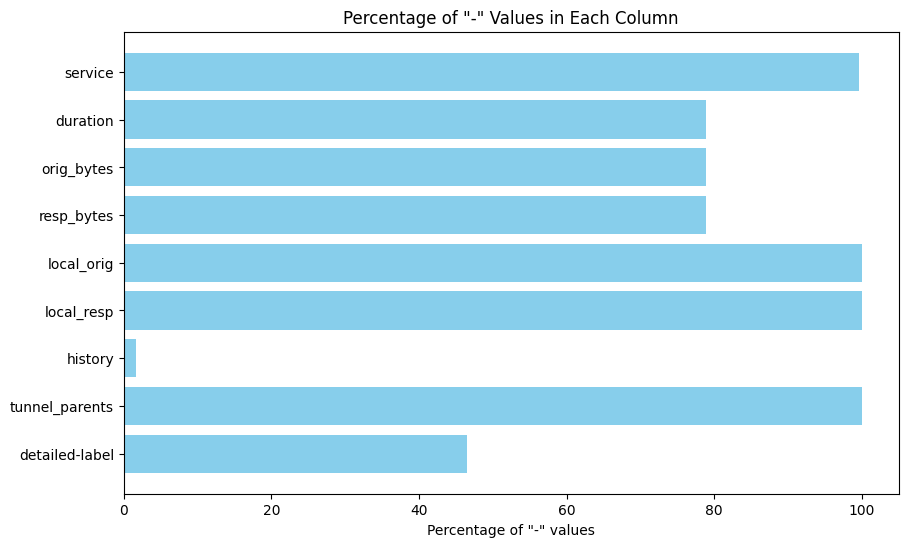

In [15]:
# Extract column names and percentages
columns = list(percentage_dict_2.keys())
percentages = list(percentage_dict_2.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(columns, percentages, color='skyblue')
plt.xlabel('Percentage of "-" values')
plt.title('Percentage of "-" Values in Each Column')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Display the plot
plt.show()

Dropping all the columns contains "-" and 0.0 values except 'history'

In [16]:
# Dropping all the columns which have "-" values

# Keep only the "history" column and drop all other columns in 'missing_val_col'
columns_to_drop = [col for col in missing_val_col_2 if col != "history"]
data = data.drop(columns=columns_to_drop)

# Now 'data' will contain only the "history" column

##Imputing value

In [17]:
# Calculate the mode of the "history" column
mode_value = data['history'].mode().iloc[0]

# Replace "-" values with the mode
data['history'].replace('-', mode_value, inplace=True)

In [18]:
data

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,label
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,S,3.0,180.0,Malicious
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,S,1.0,60.0,Malicious
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,S,1.0,60.0,Malicious
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,S,3.0,180.0,Malicious
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,S,1.0,60.0,Malicious
...,...,...,...,...,...,...,...,...,...,...
1008743,192.168.100.103,43763.0,16.219.83.137,64906.0,udp,S0,D,1.0,40.0,Benign
1008744,192.168.100.103,43763.0,100.57.245.196,39435.0,udp,S0,D,1.0,40.0,Benign
1008745,192.168.100.103,43763.0,249.99.119.9,26169.0,udp,S0,D,1.0,40.0,Benign
1008746,192.168.100.103,43763.0,205.103.167.192,18241.0,udp,S0,D,1.0,40.0,Benign


In [19]:
# Attack Class Distribution
data['label'].value_counts()

Malicious    539473
Benign       469275
Name: label, dtype: int64

#Basic EDA

## Distribution of proto values in network traffic

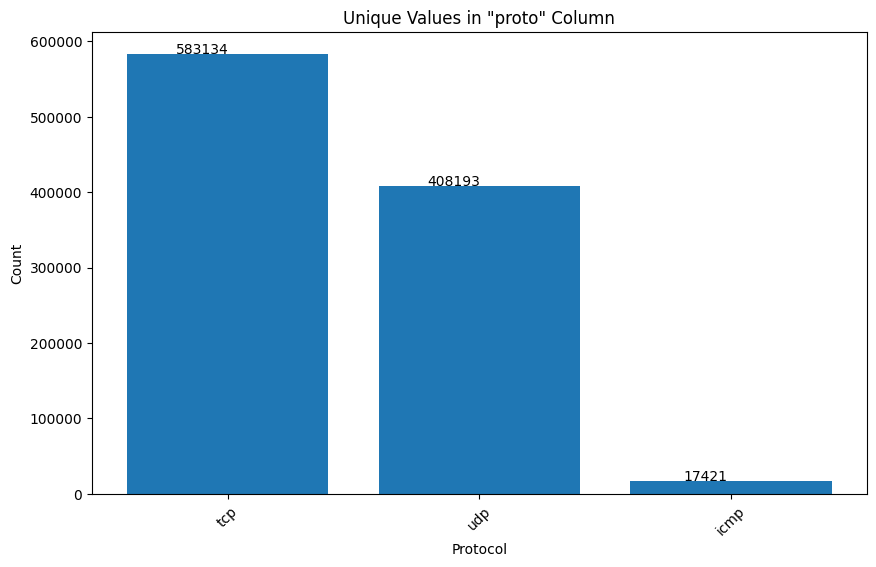

In [20]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with a 'proto' column

# Get unique values in the 'proto' column
unique_values = data['proto'].unique()

# Count the occurrences of each unique value
value_counts = data['proto'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(unique_values, value_counts)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Unique Values in "proto" Column')
plt.xticks(rotation=45)

# Add values on top of the bars
for bar, value in zip(bars, value_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.2, value, ha='center')

plt.show()


**Observation:**


The bar chart shows the number of unique proto values for each protocol. The higher the count, the more common the protocol is. Based on the bar chart, the most common protocols are TCP, UDP, and ICMP. This suggests that these three protocols are the most widely used on the network, with the rest being relatively rare.

##Distribution of proto values in network traffic w.r.t. label

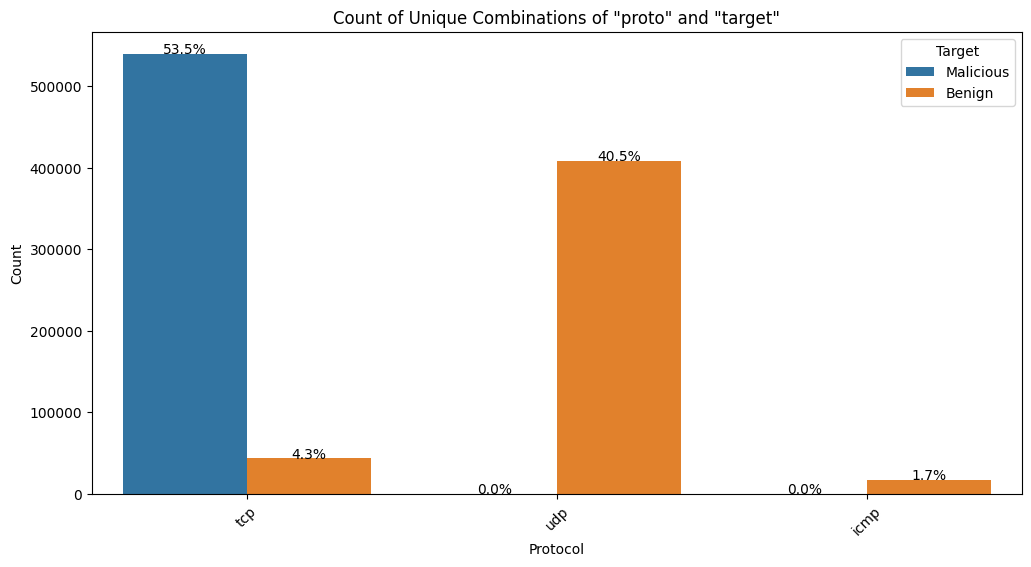

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with 'proto' and 'target' columns

# Create a bar plot showing the count of each unique combination of 'proto' and 'target'
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data, x='proto', hue='label')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Count of Unique Combinations of "proto" and "target"')
plt.xticks(rotation=45)
plt.legend(title='Target', loc='upper right')

# Annotate each bar with the percentage value
total = len(data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format(height / total * 100), ha="center")

plt.show()


**Observation:**

This indicates that selecting this particular column will yield the following results:

*   Our model will accurately classify the network as "Benign" with 100% accuracy when the network traffic is of type UDP or ICMP.
*   In the case of TCP, due to data imbalance, our model tends to predict it as malicious when provided with input labeled as "prototype='tcp'."



In [22]:
# Assuming you have a DataFrame named 'data' with a 'proto' column

# Use data.query to filter for rows where 'proto' equals 'tcp'
filtered_data = data.query('proto == "tcp"')

In [23]:
filtered_data

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,history,orig_pkts,orig_ip_bytes,label
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,S,3.0,180.0,Malicious
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,S,1.0,60.0,Malicious
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,S,1.0,60.0,Malicious
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,S,3.0,180.0,Malicious
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,S,1.0,60.0,Malicious
...,...,...,...,...,...,...,...,...,...,...
1008682,192.168.100.103,58205.0,82.219.248.202,2323.0,tcp,S0,S,1.0,60.0,Malicious
1008683,192.168.100.103,54925.0,103.137.224.128,9527.0,tcp,S0,S,1.0,60.0,Malicious
1008684,192.168.100.103,47361.0,111.49.36.18,23.0,tcp,S0,S,1.0,60.0,Malicious
1008685,192.168.100.103,46674.0,177.238.46.183,23.0,tcp,S0,S,2.0,120.0,Malicious


In [24]:
# Attack Class Distribution
filtered_data['label'].value_counts()

Malicious    539439
Benign        43695
Name: label, dtype: int64

##Encoding categorical columns

In [25]:
encoder = LabelEncoder()

# extract categorical attributes
cat_data = data.select_dtypes(include=['object']).copy()

# encode the categorical attributes
for column in cat_data.columns:
    data[column] = encoder.fit_transform(data[column])

##Finding Correlation

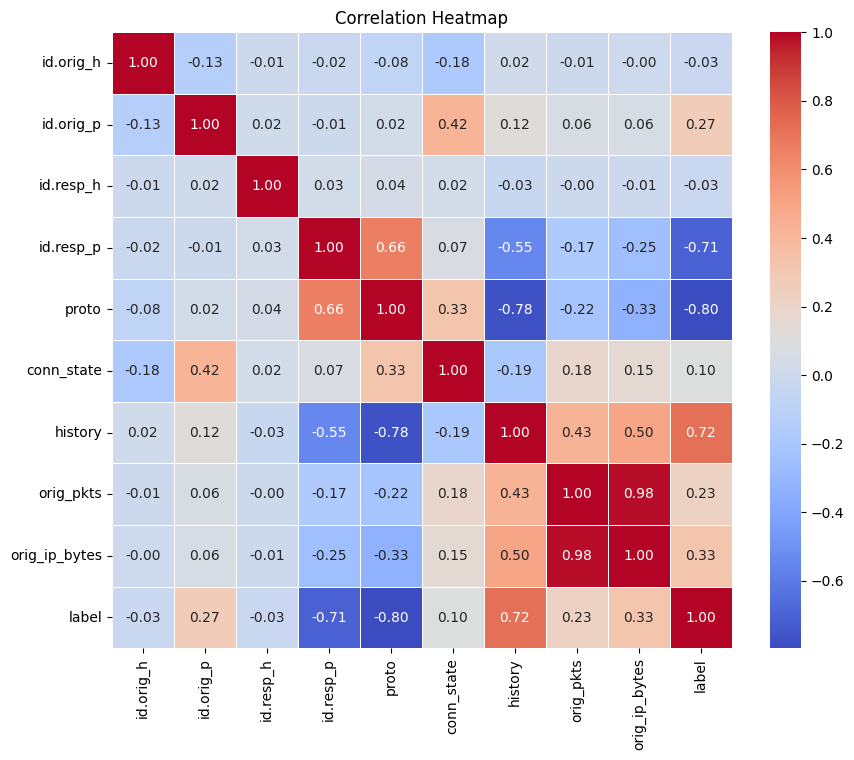

In [26]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

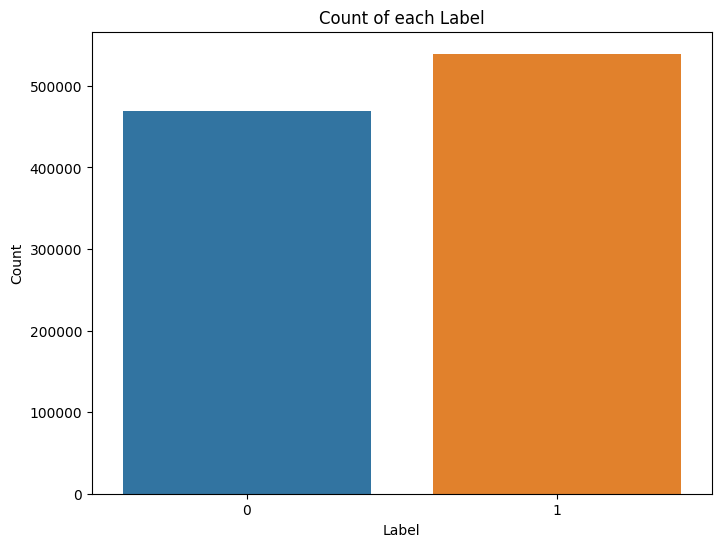

In [27]:
# 1. Count of each Label
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.title("Count of each Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


**Observation:**

The graph shows the number of labels for each unique value of the target variable.

##Box Plots: Feature vs. Label

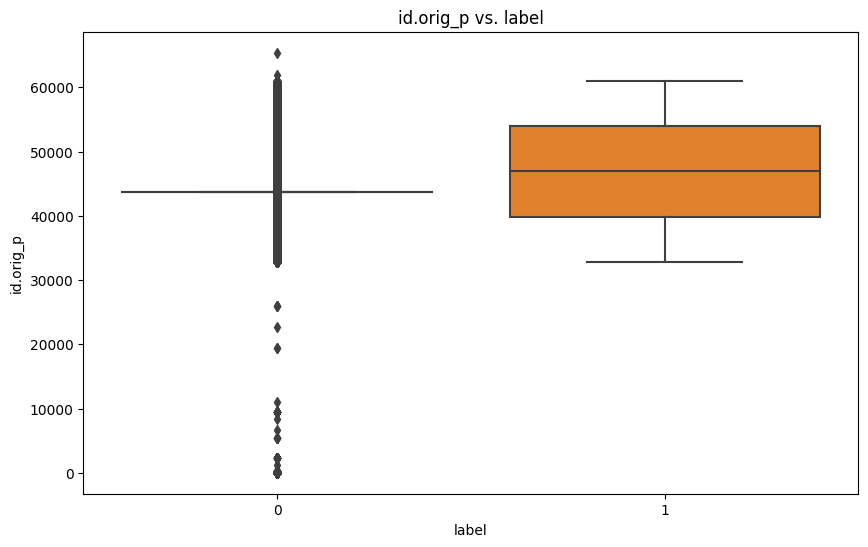

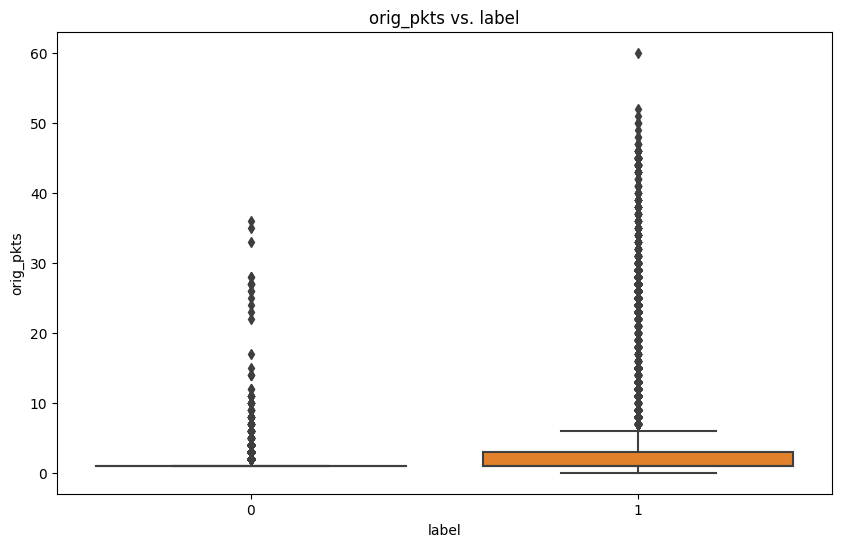

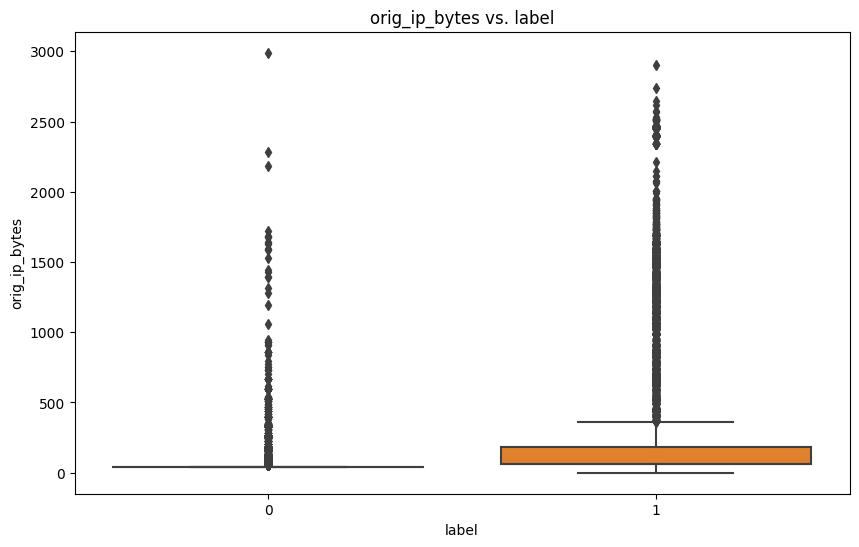

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few features for analysis (you can replace these with the features you want to analyze)
selected_features = ['id.orig_p', 'orig_pkts', 'orig_ip_bytes']

# Visualize feature distributions with respect to the 'label'
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=data)
    plt.title(f'{feature} vs. label')
    plt.xlabel('label')
    plt.ylabel(feature)
    plt.show()

